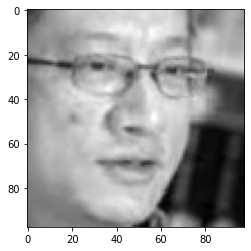

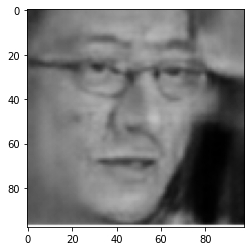

<Figure size 432x288 with 0 Axes>

0.004915583


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

img1 = mpimg.imread('/content/7.png')
img2= mpimg.imread('/content/8.png')

gray1 = rgb2gray(img1)
gray2 = rgb2gray(img2)


plt.imshow(gray1, cmap = plt.get_cmap('gray'))
plt.show()
plt.imshow(gray2, cmap = plt.get_cmap('gray'))
plt.show()

plt.savefig('lena_greyscale.png')
plt.show()
mse = np.mean( (img1 - img2) ** 2 )
print(mse)

In [ ]:
#from SSIM_PIL import compare_ssim
#from PIL import Image
from skimage.measure import compare_ssim 
image1 = gray1
image2 = gray2
value = compare_ssim(image1, image2)
print(value)

0.8710751199862913


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  after removing the cwd from sys.path.


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
cos_lib = cosine_similarity(image1, image2)
print(cos_lib)

In [ ]:
import numpy 
import math
import cv2
b=0
original = cv2.imread("/content/7.png")
contrast = cv2.imread("/content/8.png")
def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
     return 100
     PIXEL_MAX = 255.0
     return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

d=psnr(original,contrast)
print(d)
a=np.sqrt(((img1 - img2) ** 2).mean())
print(a)




None
0.070111215


In [ ]:
# example of calculating the frechet inception distance in Keras
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import randint
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
 
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)
 
# calculate frechet inception distance
def calculate_fid(model, images1, images2):
	# calculate activations
	act1 = model.predict(images1)
	act2 = model.predict(images2)
	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid
 
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
# define two fake collections of images
images1 = randint(0, 255, 10*32*32*3)
images1 = images1.reshape((10,32,32,3))
images2 = randint(0, 255, 10*32*32*3)
images2 = images2.reshape((10,32,32,3))
print('Prepared', images1.shape, images2.shape)
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
# fid between images1 and images1
fid = calculate_fid(model, images1, images1)
print('FID (same): %.3f' % fid)
# fid between images1 and images2
fid = calculate_fid(model, images1, images2)
print('FID (different): %.3f' % fid)

Using TensorFlow backend.


87916544/87910968 [==============================] - 2s 0us/step
Prepared (10, 32, 32, 3) (10, 32, 32, 3)
Scaled (10, 299, 299, 3) (10, 299, 299, 3)
FID (same): -0.000
FID (different): 45.202
